In [1]:
from besos import eppy_funcs as ef
from besos import eplus_funcs as ep

import pandas as pd
import matplotlib.pyplot as plt

import accim.sim.aPMV_setpoints as apmv

import os


In [2]:
idfname = "aPMV_testing_v01_no_script.idf"
epwfile = "ESP_Sevilla.083910_IWEC.epw"

building = ef.get_building(idfname)
ep.run_building(
    building=building,
    out_dir='sim_results_pmv',
    epw=epwfile
)


Running EnergyPlus with stdout output suppressed...


{('PEOPLE BLOCK1:ZONE2,Zone Thermal Comfort Fanger Model PMV',
  'Hourly'): EPResults(name='PEOPLE BLOCK1:ZONE2,Zone Thermal Comfort Fanger Model PMV', frequency='Hourly', units='', data=         Value
 0    -0.098049
 1    -0.097137
 2    -0.069884
 3    -0.031296
 4     0.007892
 ...        ...
 8755  0.048271
 8756  0.004717
 8757 -0.094793
 8758 -0.186862
 8759 -0.254971
 
 [8760 rows x 1 columns]),
 ('PEOPLE BLOCK1:ZONE1,Zone Thermal Comfort Fanger Model PMV',
  'Hourly'): EPResults(name='PEOPLE BLOCK1:ZONE1,Zone Thermal Comfort Fanger Model PMV', frequency='Hourly', units='', data=         Value
 0    -0.005501
 1     0.005678
 2     0.040133
 3     0.082125
 4     0.102001
 ...        ...
 8755  0.040975
 8756  0.030133
 8757 -0.025825
 8758 -0.084094
 8759 -0.126746
 
 [8760 rows x 1 columns])}

In [3]:
df_pmv = pd.read_csv('sim_results_pmv/eplusout.csv')

In [4]:
[i for i in df_pmv.columns]

['Date/Time',
 'PEOPLE BLOCK1:ZONE2:Zone Thermal Comfort Fanger Model PMV [](Hourly)',
 'PEOPLE BLOCK1:ZONE1:Zone Thermal Comfort Fanger Model PMV [](Hourly)']

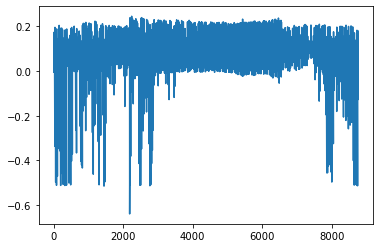

In [5]:
plt.plot(df_pmv['PEOPLE BLOCK1:ZONE1:Zone Thermal Comfort Fanger Model PMV [](Hourly)'])

As you can see, the model is capable of providing PMV values within the expected range.

In [6]:
zones = [i.Zone_or_ZoneList_Name for i in building.idfobjects['people']]

adap_coeff_cooling = {}
adap_coeff_heating = {}
tolerance = {}

for zone in zones:
    if 'zone1' in zone.lower():
        adap_coeff_cooling.update({zone: 0.4})
        adap_coeff_heating.update({zone: -0.4})
        # pmv_cooling_sp.update({i.Name: 0.3})
        # pmv_heating_sp.update({i.Name: -0.3})
    if 'zone2' in zone.lower():
        adap_coeff_cooling.update({zone: 0.3})
        adap_coeff_heating.update({zone: -0.3})
        # pmv_cooling_sp.update({i.Name: 0.2})
        # pmv_heating_sp.update({i.Name: -0.2})


In [7]:
df = apmv.generate_df_from_args(
    building=building,
    adap_coeff_cooling=adap_coeff_cooling,
    adap_coeff_heating=adap_coeff_heating,
    pmv_cooling_sp=0.5,
    pmv_heating_sp=-0.5,
)

In [8]:
df

,adap_coeff_cooling,adap_coeff_heating,pmv_cooling_sp,pmv_heating_sp,tolerance_cooling_sp_cooling_season,tolerance_cooling_sp_heating_season,tolerance_heating_sp_cooling_season,tolerance_heating_sp_heating_season,underscore_zonename
Block1:Zone2,0.3,-0.3,0.5,-0.5,-0.1,-0.1,0.1,0.1,Block1_Zone2
Block1:Zone1,0.4,-0.4,0.5,-0.5,-0.1,-0.1,0.1,0.1,Block1_Zone1


In [9]:
apmv.set_zones_always_occupied(building=building)

On Schedule already was in the model


In [10]:
building_with_apmv = apmv.add_apmv_ems_code(
    building=building,
    adap_coeff_cooling=adap_coeff_cooling,
    adap_coeff_heating=adap_coeff_heating,
    pmv_cooling_sp=0.5,
    pmv_heating_sp=-0.5,
    tolerance_cooling_sp_heating_season=-0.25,
    cooling_season_start='01/04',
    cooling_season_end='01/10',
)

PMV_H_SP_Block1_Zone2 Schedule has been added
PMV_H_SP_Block1_Zone1 Schedule has been added
PMV_C_SP_Block1_Zone2 Schedule has been added
PMV_C_SP_Block1_Zone1 Schedule has been added
Added - PMV_Block1_Zone2 Sensor
Added - People_Occupant_Count_Block1_Zone2 Sensor
Added - PMV_Block1_Zone1 Sensor
Added - People_Occupant_Count_Block1_Zone1 Sensor
Added - PMV_H_SP_act_Block1_Zone2 Actuator
Added - PMV_H_SP_act_Block1_Zone1 Actuator
Added - PMV_C_SP_act_Block1_Zone2 Actuator
Added - PMV_C_SP_act_Block1_Zone1 Actuator
Added - CoolingSeason GlobalVariable object
Added - CoolSeasonEnd GlobalVariable object
Added - CoolSeasonStart GlobalVariable object
Added - tolerance_cooling_sp_Block1_Zone2 GlobalVariable object
Added - tolerance_cooling_sp_Block1_Zone1 GlobalVariable object
Added - tolerance_cooling_sp_cooling_season_Block1_Zone2 GlobalVariable object
Added - tolerance_cooling_sp_cooling_season_Block1_Zone1 GlobalVariable object
Added - tolerance_cooling_sp_heating_season_Block1_Zone2 Glo

In [11]:
ep.run_building(
    building=building_with_apmv,
    out_dir='sim_results_apmv',
    epw=epwfile
)


Running EnergyPlus with stdout output suppressed...


{('EMS,Adaptive Coefficient_Block1_Zone2',
  'Hourly'): EPResults(name='EMS,Adaptive Coefficient_Block1_Zone2', frequency='Hourly', units='', data=      Value
 0      -0.3
 1      -0.3
 2      -0.3
 3      -0.3
 4      -0.3
 ...     ...
 8755   -0.3
 8756   -0.3
 8757   -0.3
 8758   -0.3
 8759   -0.3
 
 [8760 rows x 1 columns]),
 ('EMS,Adaptive Coefficient_Block1_Zone1',
  'Hourly'): EPResults(name='EMS,Adaptive Coefficient_Block1_Zone1', frequency='Hourly', units='', data=      Value
 0      -0.4
 1      -0.4
 2      -0.4
 3      -0.4
 4      -0.4
 ...     ...
 8755   -0.4
 8756   -0.4
 8757   -0.4
 8758   -0.4
 8759   -0.4
 
 [8760 rows x 1 columns]),
 ('EMS,aPMV_Block1_Zone2',
  'Hourly'): EPResults(name='EMS,aPMV_Block1_Zone2', frequency='Hourly', units='', data=         Value
 0     0.312401
 1     0.329282
 2     0.369974
 3     0.383496
 4     0.384631
 ...        ...
 8755  0.315998
 8756  0.299767
 8757  0.235150
 8758  0.169775
 8759  0.124041
 
 [8760 rows x 1 columns]),
 ('

(-1.0, 1.0)

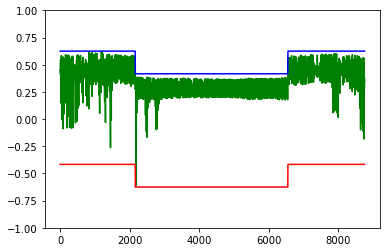

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df_apmv = pd.read_csv('sim_results_apmv/eplusout.csv')

apmv_block1_zone1 = [i for i in df_apmv.columns if 'aPMV_Block1_Zone1' in i][0]
apmv_block1_zone1_cooling = [
    i
    for i
    in df_apmv.columns
    if 'aPMV' in i
       and 'Block1_Zone1' in i
       and 'cooling' in i.lower()
       and 'no tolerance' in i.lower()
]
apmv_block1_zone1_heating = [
    i
    for i
    in df_apmv.columns
    if 'aPMV' in i
       and 'Block1_Zone1' in i
       and 'heating' in i.lower()
       and 'no tolerance' in i.lower()
]

plt.plot(df_apmv[apmv_block1_zone1], color='green')
plt.plot(df_apmv[apmv_block1_zone1_cooling], color='blue')
plt.plot(df_apmv[apmv_block1_zone1_heating], color='red')
plt.ylim(-1, 1)

In [13]:
files_to_delete = [f'sim_results_apmv/{i}' for i in os.listdir('sim_results_apmv')]
files_to_delete

['sim_results_apmv/eplusout.audit',
 'sim_results_apmv/eplusout.bnd',
 'sim_results_apmv/eplusout.csv',
 'sim_results_apmv/eplusout.dxf',
 'sim_results_apmv/eplusout.eio',
 'sim_results_apmv/eplusout.end',
 'sim_results_apmv/eplusout.err',
 'sim_results_apmv/eplusout.eso',
 'sim_results_apmv/eplusout.mdd',
 'sim_results_apmv/eplusout.mtd',
 'sim_results_apmv/eplusout.rdd',
 'sim_results_apmv/eplusout.shd',
 'sim_results_apmv/eplustbl.csv',
 'sim_results_apmv/eplustbl.htm',
 'sim_results_apmv/epluszsz.csv']

In [14]:
for i in files_to_delete:
    try:
        os.remove(i)
    except FileNotFoundError:
        pass